# Исследование закономерностей влияющих на успешность компьютерных игр.

Я работаю в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Представлены данные до 2016 года. Нужно сделать прогноз на 2017 год. 

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Описание данных.
`Name` — название игры.

`Platform` — платформа.

`Year_of_Release` — год выпуска.

`Genre` — жанр игры.

`NA_sales` — продажи в Северной Америке (миллионы проданных копий).

`EU_sales` — продажи в Европе (миллионы проданных копий).

`JP_sales` — продажи в Японии (миллионы проданных копий).

`Other_sales` — продажи в других странах (миллионы проданных копий).

`Critic_Score` — оценка критиков (максимум 100).

`User_Score` — оценка пользователей (максимум 10).

`Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

### Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd

import matplotlib.pyplot as plt 

import numpy as np

import seaborn as sns

from scipy import stats as st

In [2]:
try:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [6]:
data.duplicated().sum()

0

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


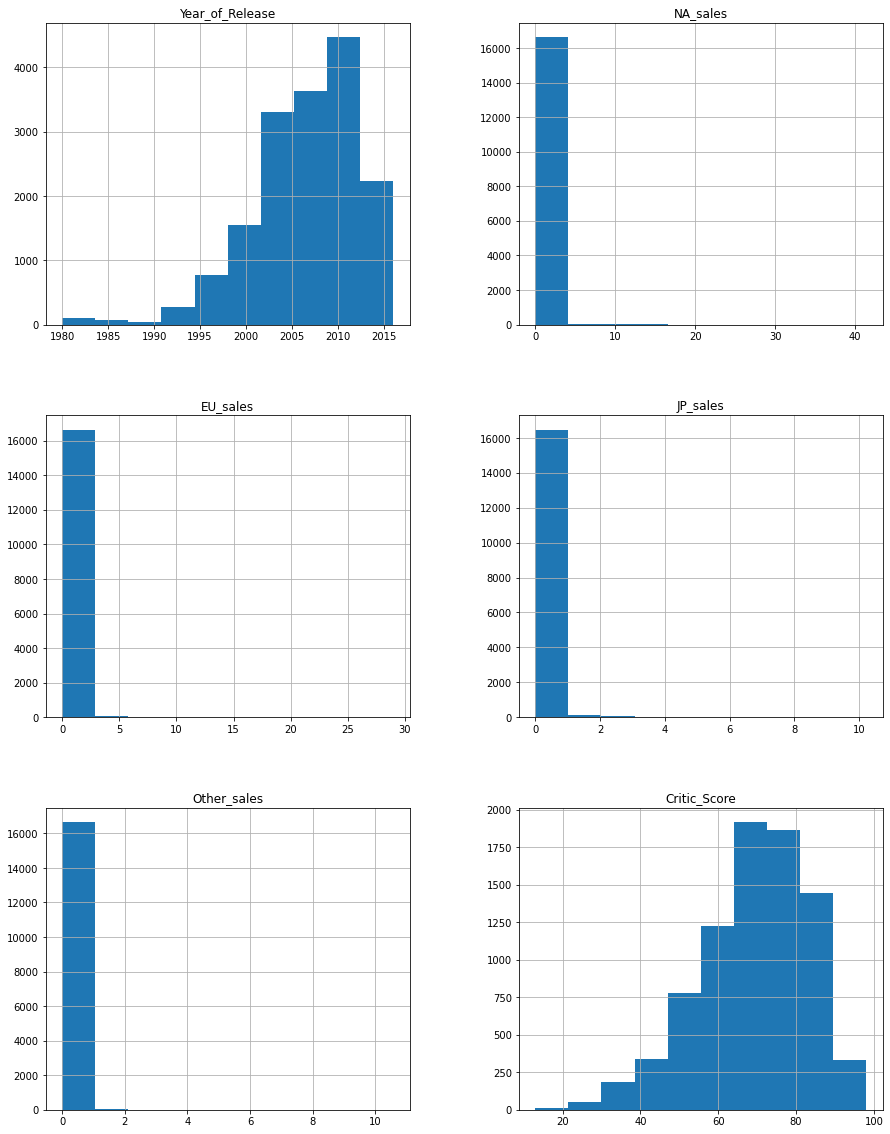

In [8]:
data.hist(figsize=(15, 20));

#### Выводы
Перед анализом данных проведем предобработку данных в тех столбцах, которые понадобятся. Исключим аномальные значения и пропуски, поменяем тип данных.

### Подготовьте данные

#### Замените названия столбцов (приведите к нижнему регистру);

In [9]:
data.columns = data.columns.str.lower()

#### Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему. 

<div style="border:solid gray 2px; padding: 20px">
Перед преобразованием типов данных, нужно решить проблему с пропусками, чтобы при применении функции не было ошибок.

In [10]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

<div style="border:solid gray 2px; padding: 20px">
    
Избавимся от пропусков в столбцах `name`, `year_of_release`, `genre`. Так как их меньше 1%.

In [11]:
data = data.dropna(subset = ['name', 'year_of_release', 'genre'])

<div style="border:solid gray 2px; padding: 20px">
Приведем данные в столбце с годом выпуска в целочисленные значения.

In [12]:
data['year_of_release'] = data['year_of_release'].astype("int64")

<div style="border:solid gray 2px; padding: 20px">
Оставим пропуски в столбцах с оценками и рейтингом, так как их большая часть датасета. Переведем значения tbd в NaN.

In [13]:
data['critic_score'] = np.floor(pd.to_numeric(data['critic_score'], errors='coerce'))
data['user_score'] = np.floor(pd.to_numeric(data['user_score'], errors='coerce'))

#### Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [14]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

#### Вывод.

<div style="border:solid green 4px; padding: 20px">
    
Более вероятно, что большое количество пропусков связано с тем, что взят большой временной промежуток. Рейтинг выставлялся только с определенного периода, а критики не могут охватить все версии игр для разных платформ. Так же как и оценки пользователей. А так как для прогноза нам не будет нужен актуальный временной промежуток, то и количество пропусков нас не должно напугать.

In [15]:
#например посмотрим сколько пропусков в графе пользовательской оценке до 2007 года.
data.query('(user_score.isna()==True) and (year_of_release<2011)')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,24.67
...,...,...,...,...,...,...,...,...,...,...,...,...
16706,Men in Black II: Alien Escape,GC,2003,Shooter,0.01,0.00,0.00,0.00,NaN,NaN,T,0.01
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01


### Проведите исследовательский анализ данных.

#### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [16]:
print(data['year_of_release'].value_counts().sort_values())
data['year_of_release'].describe()

1980       9
1984      14
1985      14
1988      15
1987      16
1990      16
1989      17
1983      17
1986      21
1982      36
1991      41
1992      43
1981      46
1993      60
1994     121
1995     219
1996     263
1997     289
1999     338
2000     350
1998     379
2001     482
2016     502
2013     544
2014     581
2015     606
2012     653
2004     762
2003     775
2002     829
2005     939
2006    1006
2011    1136
2007    1197
2010    1255
2009    1426
2008    1427
Name: year_of_release, dtype: int64


count    16444.000000
mean      2006.486256
std          5.875525
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

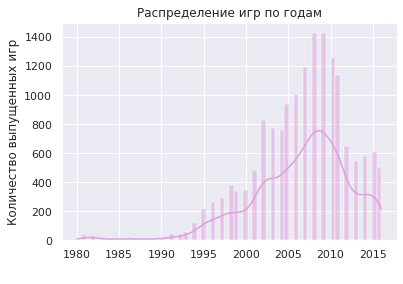

In [17]:
sns.set(style="darkgrid")
sns.histplot(data=data, x='year_of_release', color = 'plum', kde=True)
plt.title('Распределение игр по годам')
plt.ylabel('Количество выпущенных игр')
plt.xlabel(' ');
plt.show()

<div style="border:solid gray 2px; padding: 20px">
    
Одна и та же игра может выпускаться на разных платформах и со временем не только самих игр становилось больше, но и выпускались новые платформы (либо требовалась нэкстген версия игры). Пик на диаграмме наблюдается в промежуток 2006-2008. Для оценки прогноза на 2017 год не стоит рассматривать все года. Влияние на постоянно меняющийся рынок оказывают не только развивающиеся технологии, но и модель продаж. Как пример, в настоящее время существует система подписок(GamePass и прочее).

#### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

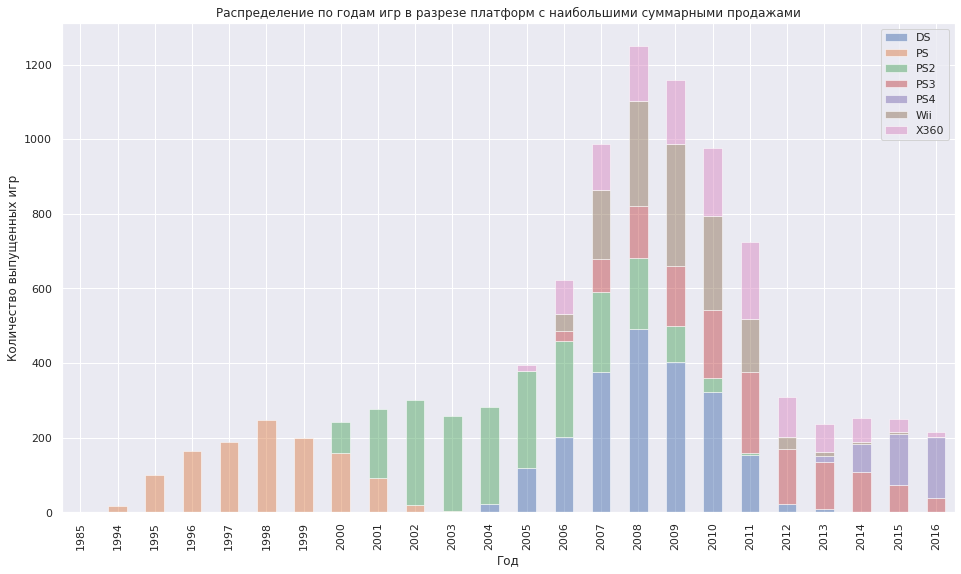

In [18]:
platform_7 = data.groupby('platform')['total_sales'].sum().sort_values(ascending = False).head(7)

sns.set(style="darkgrid")

fig, ax = plt.subplots(figsize=(20, 10))

data.query('platform in @platform_7.index').pivot_table(index='platform',
              columns='year_of_release',
              values='name',
              aggfunc='count').T.plot(kind='bar',stacked=True, ax=ax, figsize=(16,9), alpha=0.5)

ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_xlabel('Год')
ax.set_ylabel('Количество выпущенных игр')
ax.set_title('Распределение по годам игр в разрезе платформ c наибольшими суммарными продажами')

plt.show()

<div style="border:solid gray 2px; padding: 20px">
    
Видим, что каждые 5-6 лет компания Sony выпускает новое поколение своей платформы PlayStation. Как только идёт спад продаж, так появляется новое поколение. Самое "разогретое" время период с 2006 по 2011 год, когда одновременно был цикл существования четырех платформ. 

<div style="border:solid gray 2px; padding: 20px">
    
Для прогнозирования продаж на следующий год возьмём данные с 2014 года.

In [19]:
new_data = data.query('year_of_release>2013').reset_index(drop=True)

In [20]:
#выберем платформы с наибольшей выручкой в период с 2014 по 2016 год.
top_platform = new_data.groupby('platform')['total_sales'].sum()\
.sort_values(ascending = False).head(5)
top_platform

platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
Name: total_sales, dtype: float64

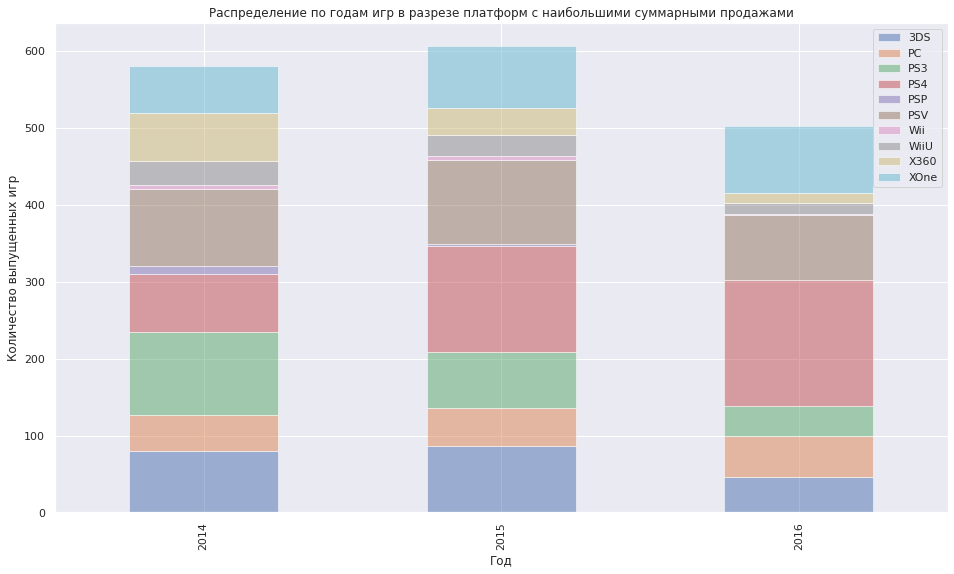

In [21]:
sns.set(style="darkgrid")

fig, ax = plt.subplots(figsize=(20, 10))

new_data.pivot_table(index='platform',
              columns='year_of_release',
              values='name',
              aggfunc='count').T.plot(kind='bar',stacked=True, ax=ax, figsize=(16,9), alpha=0.5)

ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_xlabel('Год')
ax.set_ylabel('Количество выпущенных игр')
ax.set_title('Распределение по годам игр в разрезе платформ c наибольшими суммарными продажами')

plt.show()

In [22]:
actual_data = new_data.query('platform in @top_platform.index')

#### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

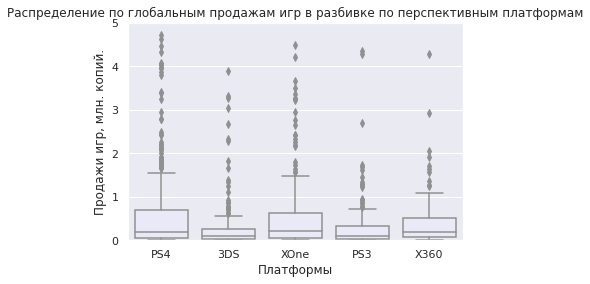

In [23]:
sns.set(style="darkgrid")
ax = sns.boxplot(x=actual_data['platform'], y=actual_data['total_sales'], color='lavender')
ax.set_ylim(0, 5)
ax.set_ylabel('Продажи игр, млн. копий.')
ax.set_xlabel('Платформы')
ax.set_title('Распределение по глобальным продажам игр в разбивке по перспективным платформам')
plt.show()

<div style="border:solid gray 2px; padding: 20px">
    
Медианные значения всех платформ не выходят даже за полмиллиона проданных копий, однако есть платформы с хитами, где продажи превышают 5 миллионов копий.

#### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

In [24]:
actual_data.query('(~user_score.isna()) and (~critic_score.isna())').\
groupby('platform')['total_sales'].corr(actual_data['user_score'])

platform
3DS     0.238730
PS3     0.169998
PS4    -0.030844
X360    0.331924
XOne   -0.104284
Name: total_sales, dtype: float64

In [25]:
actual_data.query('(~user_score.isna()) and (~critic_score.isna())').\
groupby('platform')['total_sales'].corr(actual_data['critic_score'])

platform
3DS     0.284686
PS3     0.446575
PS4     0.401903
X360    0.525723
XOne    0.422112
Name: total_sales, dtype: float64

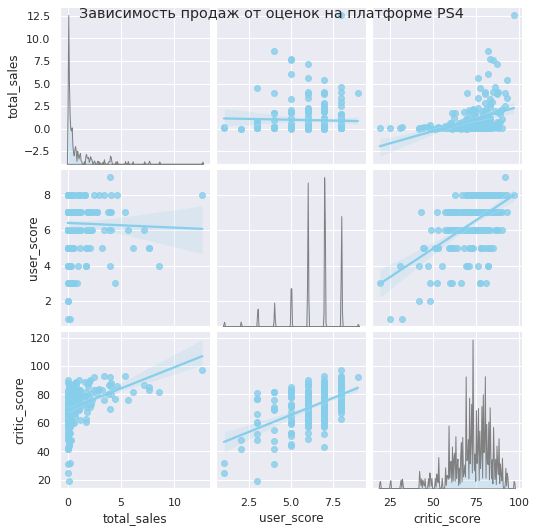

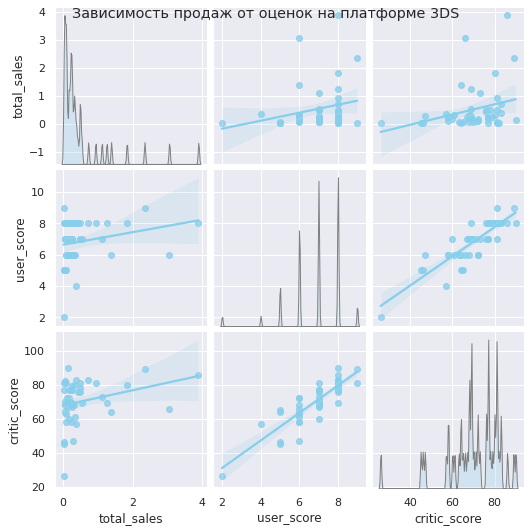

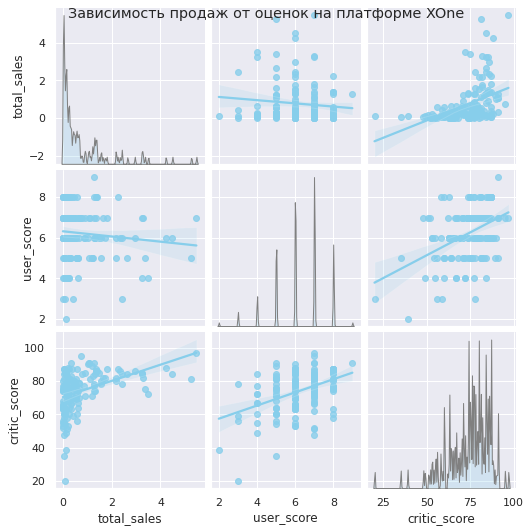

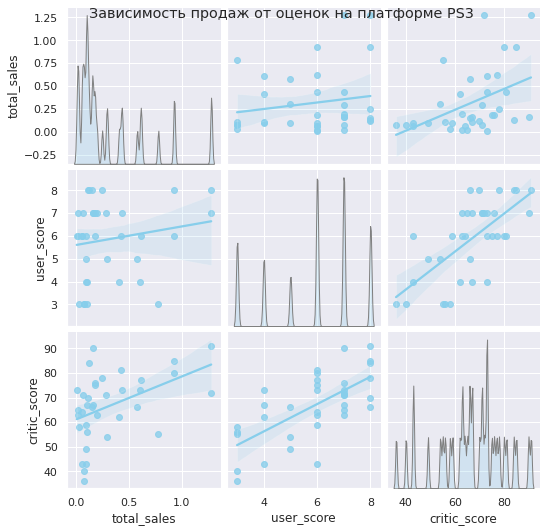

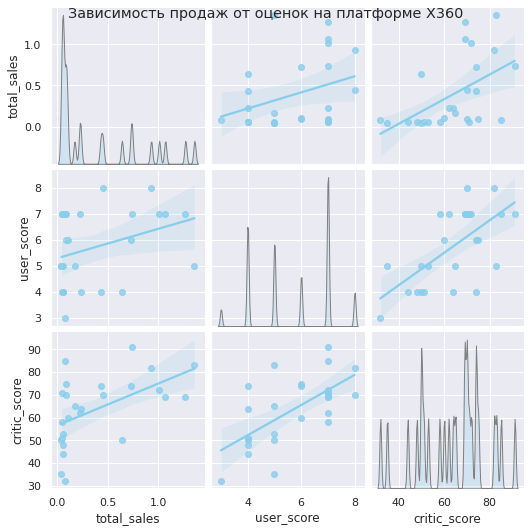

In [26]:
for platform in actual_data['platform'].unique():
    matrix_corr = actual_data.query('(platform == @platform) and (~user_score.isna()) and (~critic_score.isna())')\
    [['total_sales','user_score', 'critic_score']]
    
    ax = sns.pairplot(matrix_corr, plot_kws = dict(color = 'skyblue'),kind='reg',\
                      diag_kind='kde', diag_kws=dict(bw_adjust=.05, vertical=False, color = 'skyblue', edgecolor='gray'))
    ax.fig.suptitle(f'Зависимость продаж от оценок на платформе {platform}')
    plt.show()

<div style="border:solid gray 2px; padding: 20px">
    
Сильной зависимости от оценок нет, однако отзывы критиков имеют больше значения.

#### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

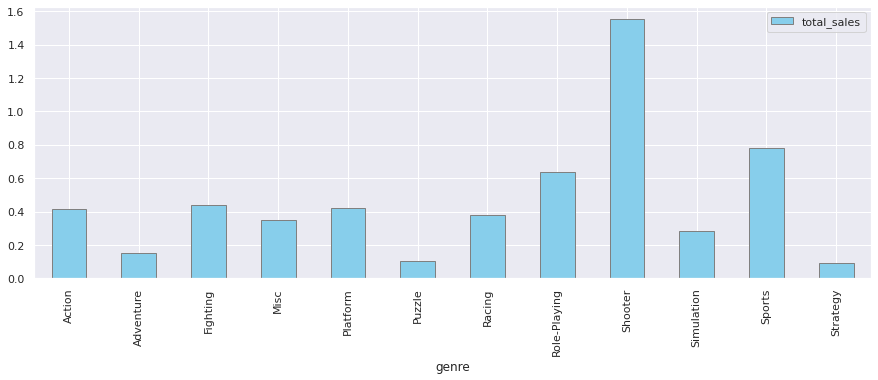

In [27]:
actual_data.pivot_table(index='genre', values='total_sales', aggfunc = 'mean').plot(grid=True, kind = 'bar', color = 'skyblue', edgecolor = 'gray', figsize=(15, 5));

<div style="border:solid gray 2px; padding: 20px">

Исследуя средние продажи, выделяется жанр `Shooter`, приносящий стабильно высокий доход. Самый низкий доход от жанров `Puzzle`, `Strategy`.

### Составьте портрет пользователя каждого региона.

#### Самые популярные платформы (топ-5). Опишите различия в долях продаж.

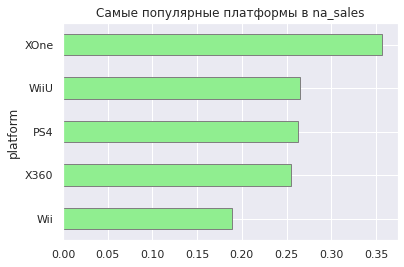

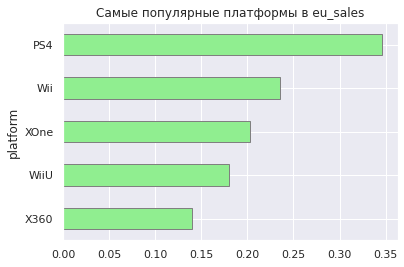

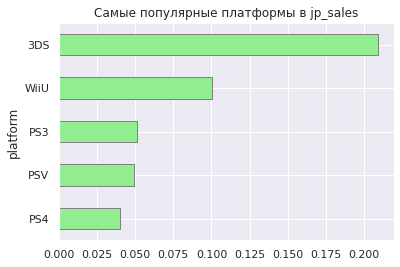

In [28]:
for sales in new_data[['na_sales', 'eu_sales', 'jp_sales']]:
    new_data.groupby('platform')[sales].mean().sort_values().tail(5).plot.barh(color='lightgreen', edgecolor = 'gray')
    plt.title(f'Самые популярные платформы в {sales}')
    plt.show()

<div style="border:solid gray 2px; padding: 20px">
    
В Японии рынок отдаёт предпочтение портативным платформам. В топе присутствуют три типа портативных устройств (`Nintendo 3DS, Wii U, Playstation Vita`). Первые три строчки топа на американском и европейском рынке делят `PlayStation 4, Wii и Xbox One`. 

#### Самые популярные жанры (топ-5). Поясните разницу.

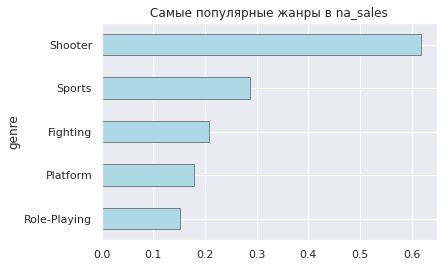

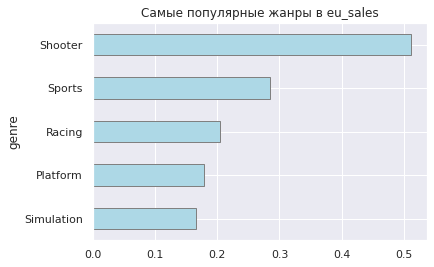

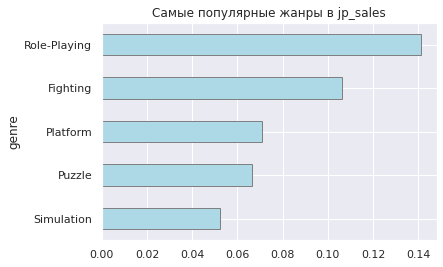

In [29]:
for sales in new_data[['na_sales', 'eu_sales', 'jp_sales']]:
    new_data.groupby('genre')[sales].mean().sort_values().tail(5).plot.barh(color='lightblue', edgecolor = 'gray')
    plt.title(f'Самые популярные жанры в {sales}')
    plt.show()

<div style="border:solid gray 2px; padding: 20px">
    
И снова японский рынок кардинально отличается от американского и европейского. Самый популярный жанр западного рынка - `Shooter`, японского - `RPG`.

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [30]:
new_data['rating'].unique()

array([nan, 'M', 'E', 'T', 'E10+'], dtype=object)

In [31]:
def rating_category(category):
    if category == 'M':
        return 'для взрослых'
    elif category == 'E':
        return 'для всех'
    elif category == 'T':
        return 'подросткам'
    elif category == 'E10+':
        return 'от 10 лет и старше'
    else:
        return 'рейтинг не определён'
       
new_data['rating_category'] = new_data['rating'].apply(rating_category)

In [32]:
new_data['rating_category'].unique()

array(['рейтинг не определён', 'для взрослых', 'для всех', 'подросткам',
       'от 10 лет и старше'], dtype=object)

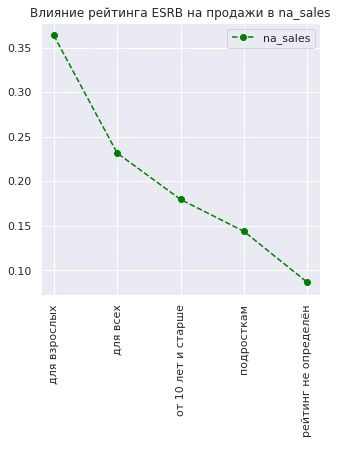

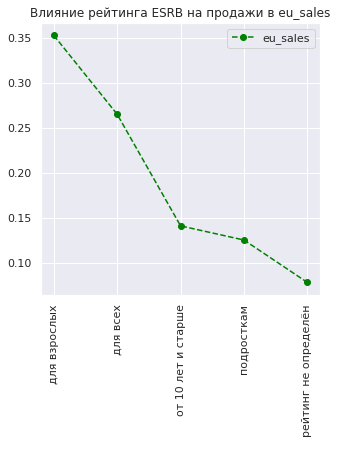

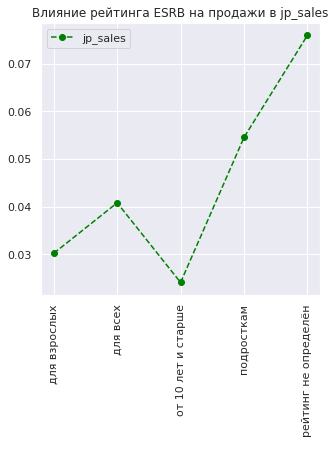

In [33]:
for sales in new_data[['na_sales', 'eu_sales', 'jp_sales']]:
    new_data.pivot_table(index = 'rating_category', values = sales).plot(grid=True, style='o--', color = 'green', figsize=(5, 5))
    plt.xticks(rotation=90)
    plt.xlabel(' ')
    plt.title(f'Влияние рейтинга ESRB на продажи в {sales}')
    plt.show()

<div style="border:solid gray 2px; padding: 20px">
 
В разных странах свои рейтинговые системы. Ассоциация ESRB определяет рейтинги для компьютерных видеоигр в США и Канаде. Поэтому на Японском рынке большинство игр 'без рейтинга'. Это связано с действующей локальной рейтинговой системой CERO.

### Проверьте гипотезы.

#### Проверка гипотезы: средние пользовательские оценки платформ `Xbox One` и `PC` одинаковые.

<div style="border:solid gray 2px; padding: 20px">
    
H₀: Средние пользовательские рейтинги (`user_score`) платформы `Xbox One` = платформе `PC`.

H₁: Средние пользовательские рейтинги (`user_score`) платформы `Xbox One` ≠ платформе `PC`.

In [34]:
#оценим равнозначность выборок
print(new_data.query('(platform == "XOne") and (user_score.isna() == False)')['user_score'].describe())
new_data.query('(platform == "PC") and (user_score.isna() == False)')['user_score'].describe()

count    165.000000
mean       6.193939
std        1.361030
min        1.000000
25%        5.000000
50%        6.000000
75%        7.000000
max        9.000000
Name: user_score, dtype: float64


count    122.000000
mean       5.819672
std        1.715348
min        1.000000
25%        5.000000
50%        6.000000
75%        7.000000
max        9.000000
Name: user_score, dtype: float64

<div style="border:solid gray 2px; padding: 20px">
    
Для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам используем метод `scipy.stats.ttest_ind`, так как выборки не равнозначны укажем атрибут `equal_var = False`.

In [36]:
xbox_mean = new_data.loc[(new_data['platform']=='XOne') & (new_data['user_score'].isna() == False), 'user_score']
pc_mean = new_data.loc[(new_data['platform']=='PC') & (new_data['user_score'].isna() == False), 'user_score']

results = st.ttest_ind(xbox_mean, pc_mean, equal_var = False)

alpha = .05

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.047722473435612776
Отвергаем нулевую гипотезу


<div style="border:solid gray 2px; padding: 20px">
    
**Вывод**: средние пользовательские оценки Xbox One и PC разные.

####  Проверка гипотезы: средние пользовательские рейтинги жанров `Action` и `Sports` разные.

<div style="border:solid gray 2px; padding: 20px">
    
H₀: Средние пользовательские рейтинги (`user_score`) жанра `Action` = жанру `Sports`.

H₁: Средние пользовательские рейтинги (`user_score`) жанра `Action` ≠  жанра `Sports`.

In [37]:
#оценим равнозначность выборок
print(new_data.query('(genre =="Action") and (user_score.isna() == False)')['user_score'].describe())
new_data.query('(genre =="Sports") and (user_score.isna() == False)')['user_score'].describe()

count    297.000000
mean       6.289562
std        1.391453
min        2.000000
25%        6.000000
50%        7.000000
75%        7.000000
max        9.000000
Name: user_score, dtype: float64


count    127.000000
mean       4.834646
std        1.863449
min        0.000000
25%        4.000000
50%        5.000000
75%        6.000000
max        8.000000
Name: user_score, dtype: float64

In [38]:
action_mean = new_data.loc[(new_data['genre']=='Action') & (new_data['user_score'].isna() == False), 'user_score']
sports_mean = new_data.loc[(new_data['genre']=='Sports') & (new_data['user_score'].isna() == False), 'user_score']

results = st.ttest_ind(action_mean, sports_mean, equal_var = False)

alpha = .05

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 2.1579210941835162e-13
Отвергаем нулевую гипотезу


<div style="border:solid gray 2px; padding: 20px">
    
**Вывод**: средние пользовательские рейтинги жанров Action и Sports разные.

### Общий вывод

<div style="border:solid green 4px; padding: 20px">

**Исследовательский анализ данных.**
- Цикл смены поколений для платформ составляет `5-6 лет`. Как только идёт снижение продаж, появляется новое поколение.

- Медианные значения всех платформ не выходят даже за полмиллиона проданных копий, однако есть платформы с хитами, где продажи превышают 5 миллионов копий.

- Сильной зависимости от оценок нет, однако `отзывы критиков` имеют больше значения.

**Составление портрета для каждого региона.** 
- Cамый прибыльный жанр `Shooter`, а `Puzzle и Strategy` приносят самый низкий доход. 

- В Японии рынок отдаёт предпочтение портативным платформам. В топе присутствуют три типа портативных устройств (`Nintendo 3DS, Wii U, Playstation Vita`). Первые три строчки топа на американском и европейском рынке делят `PlayStation 4, Wii и Xbox One`.

- Японский рынок кардинально отличается от американского и европейского. Самый популярный жанр западного рынка - `Shooter`, японского - `RPG`.

- Самые продаваемые игры на западном рынке с рейтингом `M`(«Для взрослых»: Материалы игры не подходят для лиц младше 17 лет). На японском рынке - `Без рейтинга`. Это ознаечает, что влияние ESRB не влияет на японский рынок.

**Проверка гипотез.**
- Средние пользовательские оценки `Xbox One и PC` разные.

- Средние пользовательские рейтинги жанров `Action и Sports` разные.